#**Shaikh Saif Hisamuddin**

#**Let's Grow More - VIP**

Task 1 : To Analyse the given data and find out the optimum number of clusters

**Importing required Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

**Importing Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

**Exploring Data**

In [ ]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
#Checking Null Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Finding the unique values in Species Column
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Using elbow method to find number of clusters
error = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(data[["PetalLengthCm","PetalWidthCm"]])
  error.append(km.inertia_)
error

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.49940089968511,
 13.933308757908758,
 11.056639971910453,
 9.20147591442374,
 7.7830201781628,
 6.472894541406307]

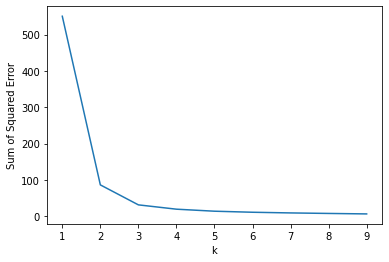

In [ ]:
#plotting the elbow graph
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")
plt.plot(range(1,10),error)

In [ ]:
#finding the cluster Values
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(data[["PetalLengthCm","PetalWidthCm"]])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
#Adding Cluster to dataset
data["Cluster"] = y_predict
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [ ]:
#separating dataset based on respective clusters
df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]

In [ ]:
#finding Centroid
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

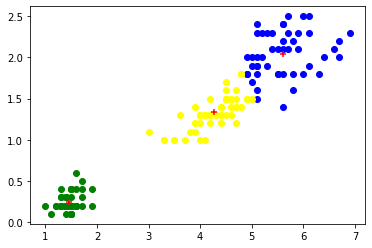

In [ ]:
#Plotting the Final Plot
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm,color = "blue",label="Cluster1")
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm,color = "green",label="Cluster2")
plt.scatter(df3.PetalLengthCm,df3.PetalWidthCm,color = "yellow",label="Cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker="+",label="Centroid")

Thank You